In [1]:
import sys
sys.path.append('./paralel_planarity_criterion')

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import planarity_criterion as pc 
import printers as printers
import numpy as np

planarity_crit = pc.PlanarityCriterion()
printer = printers.Printer()
tcc_printer = printers.ConnectedComponentsDrawer()

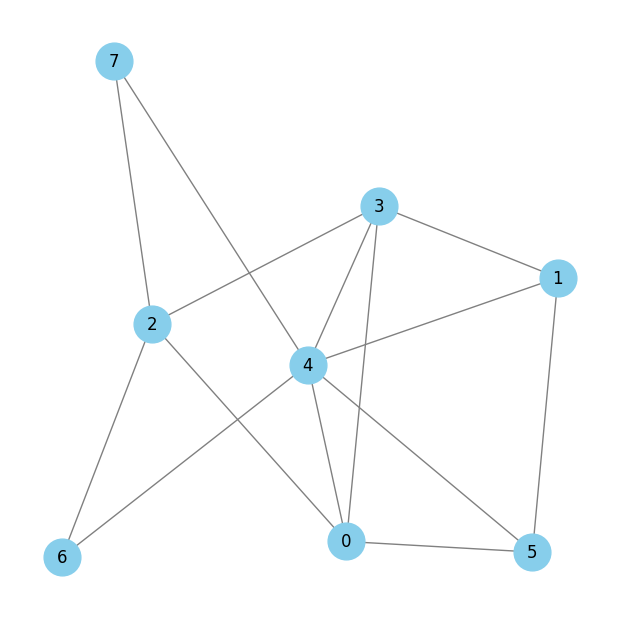

In [3]:
# TAKE GRAPH FROM EXAMPLES
import graph_examples as examples

graph_examples = examples.GraphExamples.get_examples()
G = graph_examples[14]

# Draw the graph
plt.figure(figsize=(6, 6))
nx.draw(G, with_labels=True, node_color='skyblue', node_size=700, edge_color='gray')
plt.show()

In [4]:
### FUNCTION TO SHOW EACH STEP OF PLANAR-1
def step_by_step(G, MAX_MATRIX_PRINT = 50):    
    planar, info = planarity_crit.is_planar(G)
    print("Correct result: ", nx.is_planar(G) == planar)

    
    if not planar:
        print(f"""
                Nonplanar graph
                Failing reason: {info["failing_reason"]}
                Failing TCC: {info["failing_tcc"]}
                """
             )
    else:
         print(f"""
                Planar graph
                """
             )
    
    def get_graph_tcc(tcc_list, G):
        tcc = G.subgraph(tcc_list["node_list"]).copy()
        # Add virtual edges to each tcc
        tcc.add_edges_from(tcc_list["virtual_edges"])
        return tcc
    
    def draw_graph(G, title="Graph"):
        pos = nx.spring_layout(G)  # or use nx.planar_layout(G) for planar graphs
        nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray')
        plt.title(title)
        plt.show()
        
    tcc_printer.print_n_connected_components(G, info["TCCs"], N=3, name="Triconnected components" )
    print()
    print("STEP BY STEP EXECUTION")
    print()
    for i, tcc_list in enumerate(info["TCCs"]): 
        tcc = get_graph_tcc(tcc_list, G)
        if (i >= len(info["planarity_info"])): break # If G is nonplanar, not all TCCs have info
        tcc_info = info["planarity_info"][i]
        print(" " * 50 + ">>> TRICONNECTED COMPONENT" + str(i) + "  <<<")   
        draw_graph(tcc, title="Triconnected component with nodes " + str(tcc.nodes()) )
        
        if (tcc_info["spanning_tree"]): 
            printer.print_spanning_tree(tcc, tcc_info["spanning_tree"])
        print()
        print("BRIDGES OF ALL FUNDAMENTAL CYCLES")
        if (tcc_info["bridges"]): 
            printer.print_bridges(tcc, tcc_info["bridges"])
        print()
        print("PSEUDO-EMBEDDING INFO")
        if(tcc_info["A1"]):    
            if (len(tcc_info["A1"]) <= MAX_MATRIX_PRINT):
                printers.Printer.print_B_matrix(tcc_info["A1"], "A1 matrix") 
                if(tcc_info["B1"]): printers.Printer.print_B_matrix(tcc_info["B1"], "B1 matrix") 
        if (tcc_info["truth_assign"]): 
            print()
            print("PSEUDO-EMBEDDING")
            printers.Printer.print_cycle_edge_table(tcc_info["truth_assign"], tcc_info["edge_index_map"], tcc_info["cycle_index_map"])
        else:
            print("Failed to find truth assignment")
        print("\n" + "="*150)
        print(" " * 50 + ">>> END TRICONNECTED COMPONENT <<<")
        print("="*150 + "\n")
        print()
        print()

Correct result:  True

                Planar graph
                


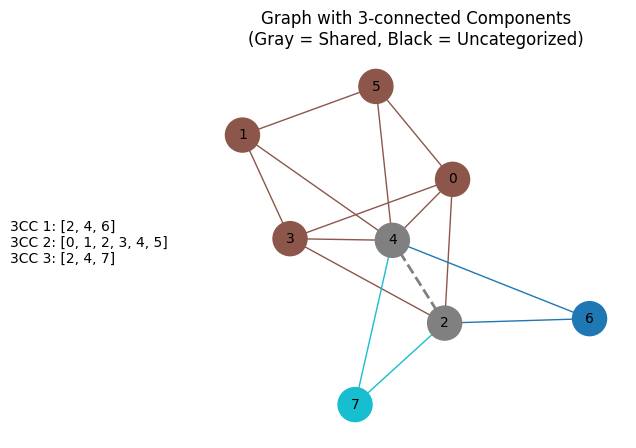


STEP BY STEP EXECUTION

                                                  >>> TRICONNECTED COMPONENT0  <<<


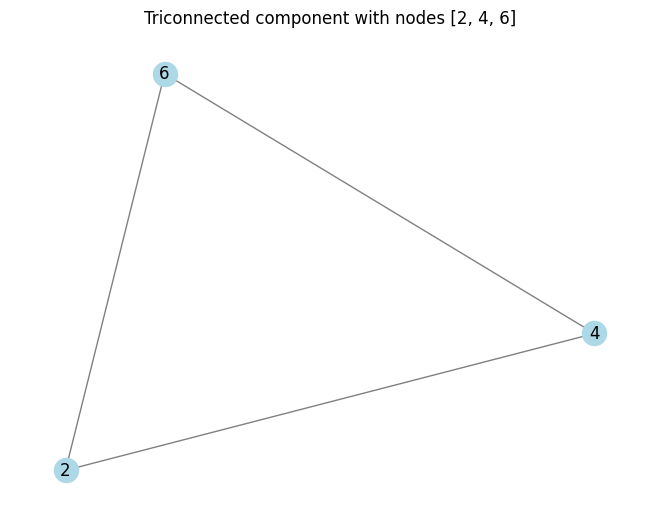

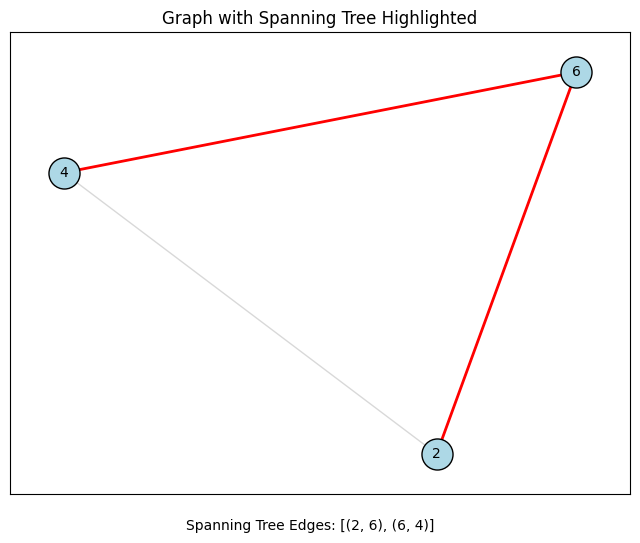


BRIDGES OF ALL FUNDAMENTAL CYCLES
No bridges found for cycle: [2, 6, 4, 2]

PSEUDO-EMBEDDING INFO

A1 matrix:
    0  1  2  3  4  5
 0| 1  0  0  0  0  0
 1| 0  1  0  0  0  0
 2| 0  0  1  0  0  0
 3| 0  0  0  1  0  0
 4| 0  0  0  0  1  0
 5| 0  0  0  0  0  1

B1 matrix:
    0  1  2  3  4  5
 0| 0  -  -  -  -  -
 1| -  0  -  -  -  -
 2| -  -  0  -  -  -
 3| -  -  -  0  -  -
 4| -  -  -  -  0  -
 5| -  -  -  -  -  0

PSEUDO-EMBEDDING
Cycle/Edge    (6, 2)  (4, 2)  (6, 4)  
--------------------------------------
(2, 6, 4, 2)  True    True    True    

                                                  >>> END TRICONNECTED COMPONENT <<<



                                                  >>> TRICONNECTED COMPONENT1  <<<


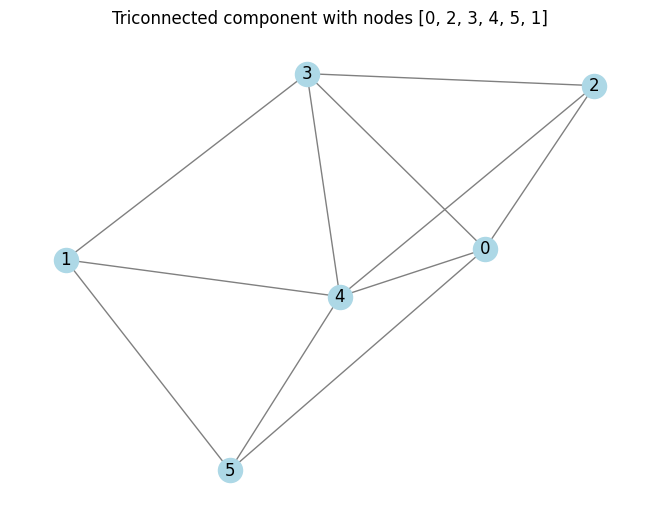

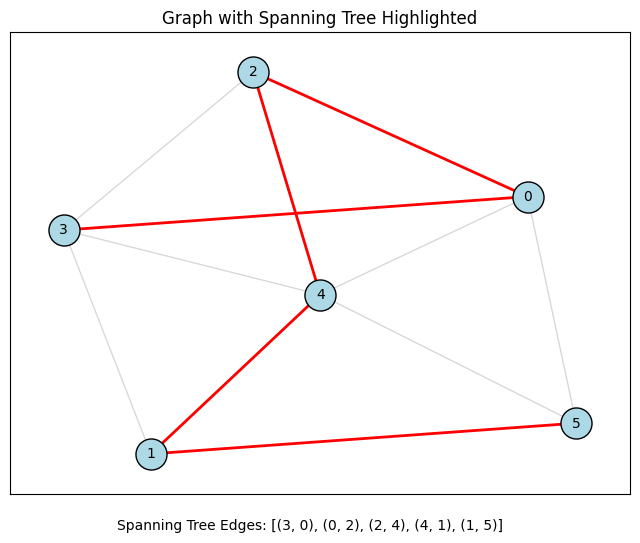


BRIDGES OF ALL FUNDAMENTAL CYCLES


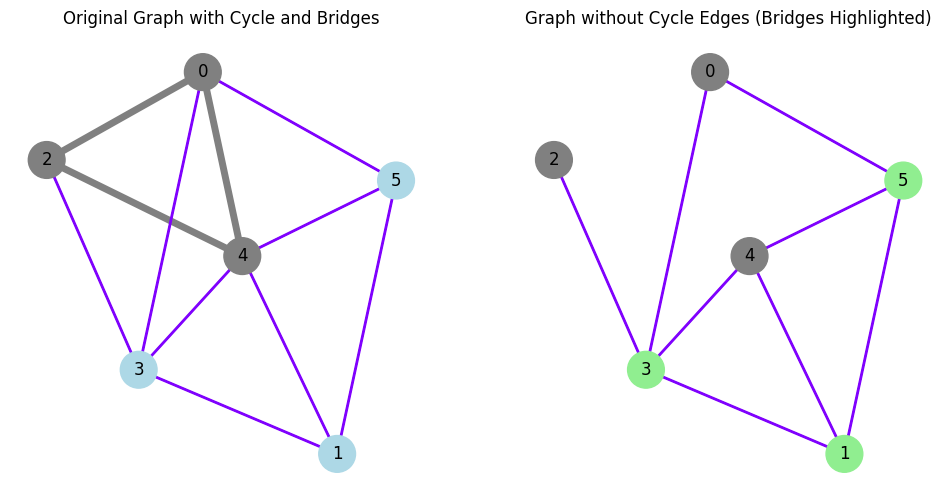

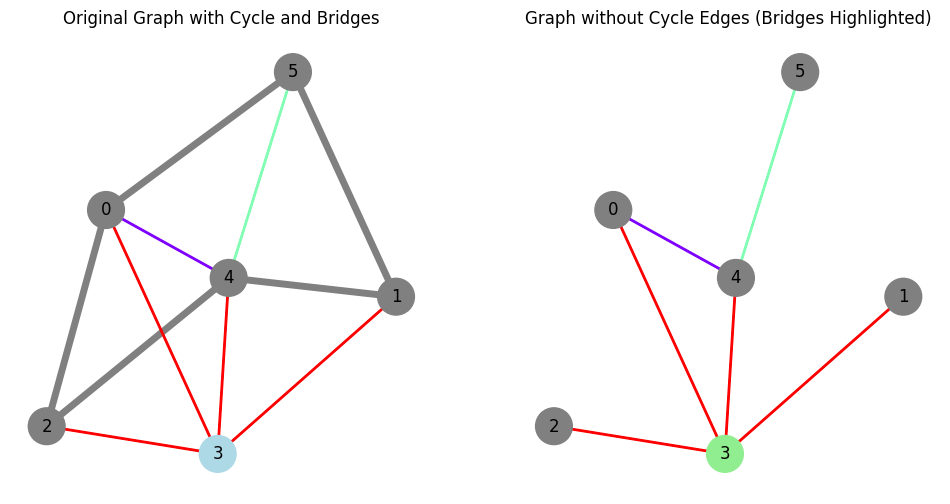

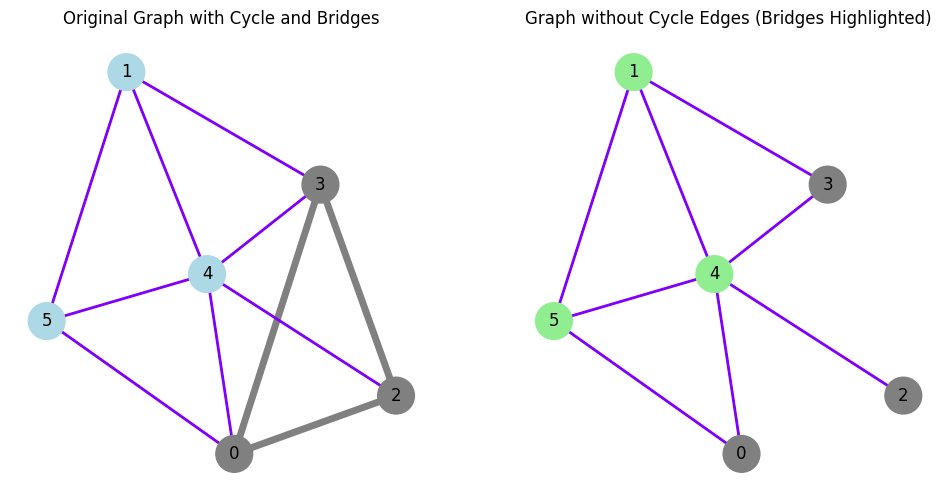

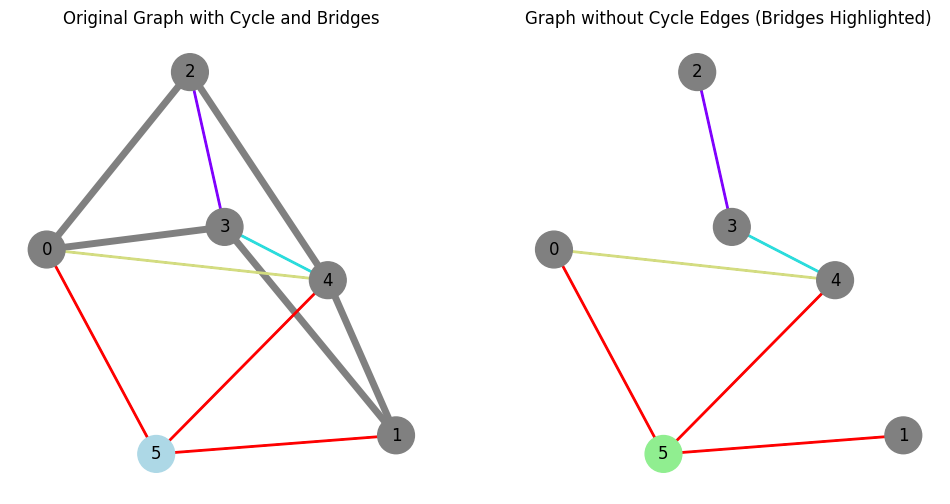

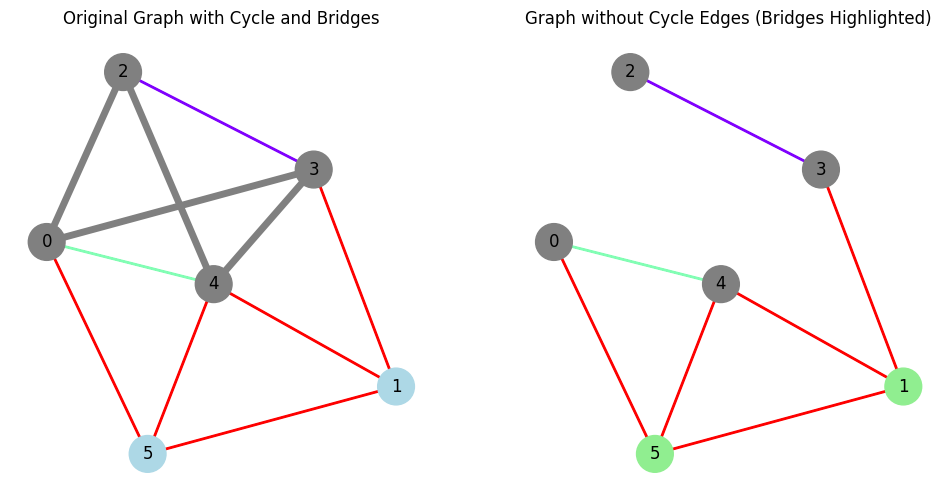

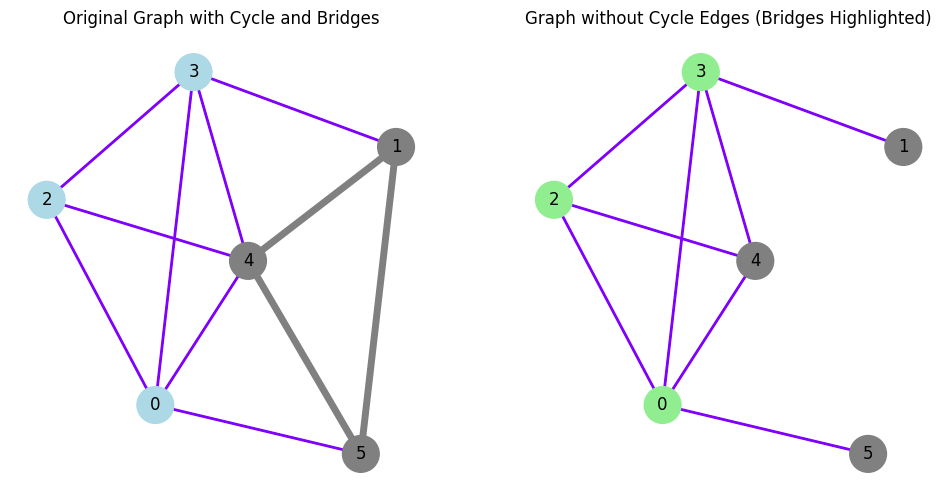


PSEUDO-EMBEDDING INFO

PSEUDO-EMBEDDING
Cycle/Edge          (2, 0)  (3, 0)  (4, 0)  (5, 0)  (3, 2)  (4, 2)  (1, 3)  (4, 3)  (1, 4)  (5, 4)  (1, 5)  
------------------------------------------------------------------------------------------------------------
(0, 2, 4, 0)        True    False   True    False   False   True    False   False   False   False   False   
(0, 2, 4, 1, 5, 0)  True    False   True    True    False   True    False   False   True    True    True    
(2, 0, 3, 2)        True    True    False   False   True    False   False   False   False   False   False   
(3, 0, 2, 4, 1, 3)  True    True    True    True    False   True    True    False   True    True    True    
(3, 0, 2, 4, 3)     True    True    False   False   True    True    False   True    False   False   False   
(4, 1, 5, 4)        False   False   False   False   False   False   False   False   True    True    True    

                                                  >>> END TRICONNECTED COMPONENT <<<



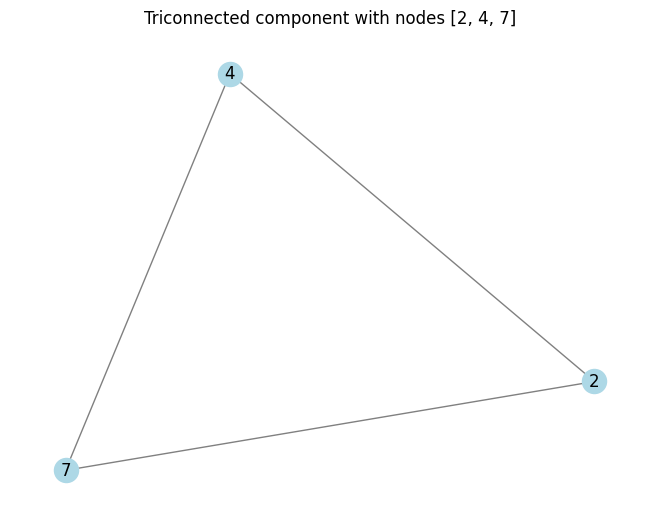

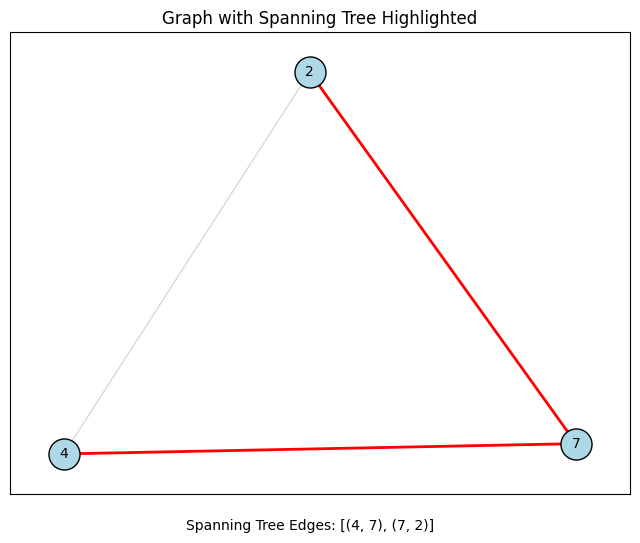


BRIDGES OF ALL FUNDAMENTAL CYCLES
No bridges found for cycle: [2, 7, 4, 2]

PSEUDO-EMBEDDING INFO

A1 matrix:
    0  1  2  3  4  5
 0| 1  0  0  0  0  0
 1| 0  1  0  0  0  0
 2| 0  0  1  0  0  0
 3| 0  0  0  1  0  0
 4| 0  0  0  0  1  0
 5| 0  0  0  0  0  1

B1 matrix:
    0  1  2  3  4  5
 0| 0  -  -  -  -  -
 1| -  0  -  -  -  -
 2| -  -  0  -  -  -
 3| -  -  -  0  -  -
 4| -  -  -  -  0  -
 5| -  -  -  -  -  0

PSEUDO-EMBEDDING
Cycle/Edge    (7, 2)  (4, 2)  (7, 4)  
--------------------------------------
(2, 7, 4, 2)  True    True    True    

                                                  >>> END TRICONNECTED COMPONENT <<<





In [5]:
### EXECUTION OF PLANAR-1(G) STEP BY STEP ###
step_by_step(G)

In [6]:
# 🎲 Generate a random seed  ### interesting seeds: 3244861328
seed = random.randint(0, 2**32 - 1)
print("Using seed:", seed)

# 🌱 Seed NumPy’s RNG
np.random.seed(seed)

Using seed: 2883850203


Using seed: 1966


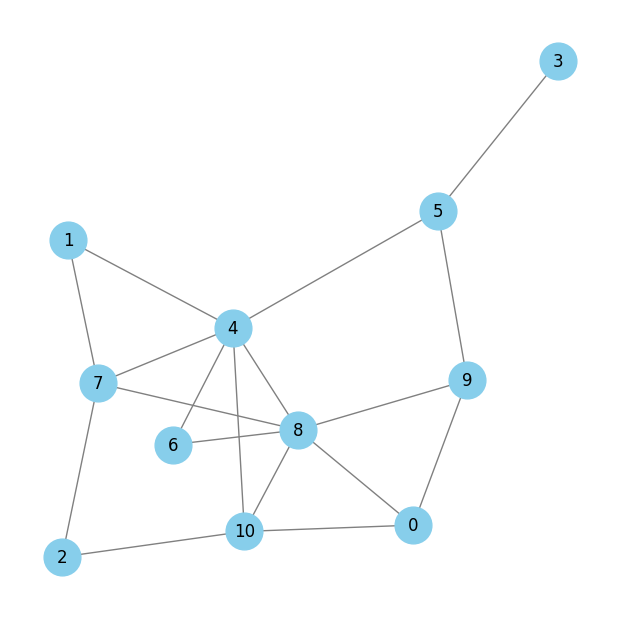

In [7]:
### CREATE A RANDOM GRAPH G ###

# 🎲 Generate a random seed
seed = 1966
# seed = random.randint(0, 2**32 - 1) # Uncomment to get a random seed
print("Using seed:", seed)

# 🌱 Seed NumPy’s RNG
np.random.seed(seed)
random.seed(seed)

# Parameters
n = 11 # Number of nodes
p = 0.3 # Probability of edge creation

# Generate a random connected Erdős-Rényi graph
G = nx.erdos_renyi_graph(n, p)
while not nx.is_connected(G):
    G = nx.erdos_renyi_graph(n, p)


# Draw the graph
plt.figure(figsize=(6, 6))
nx.draw(G, with_labels=True, node_color='skyblue', node_size=700, edge_color='gray')
plt.show()

Correct result:  True

                Planar graph
                


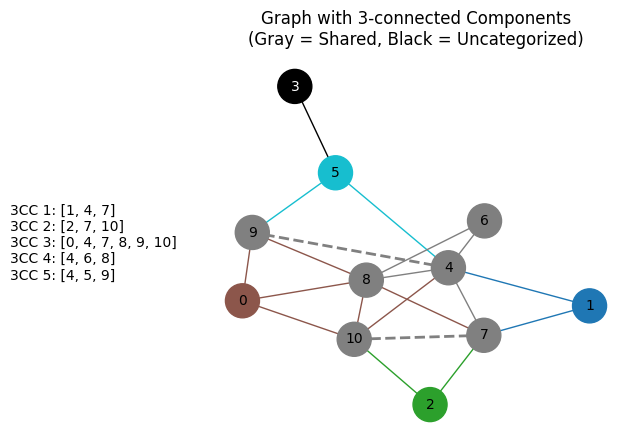


STEP BY STEP EXECUTION

                                                  >>> TRICONNECTED COMPONENT0  <<<


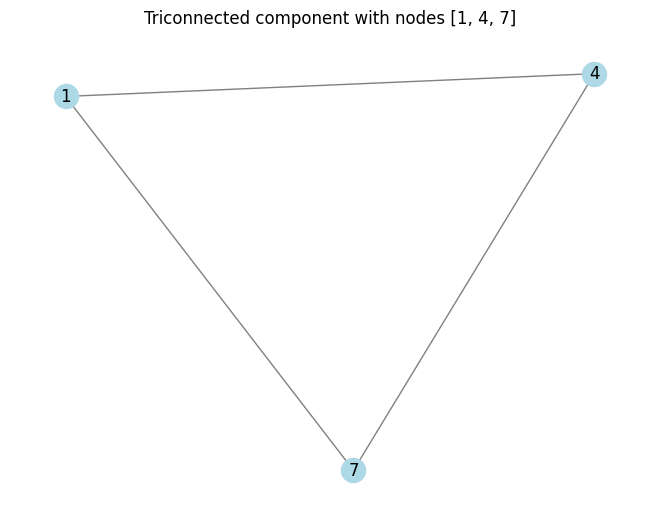

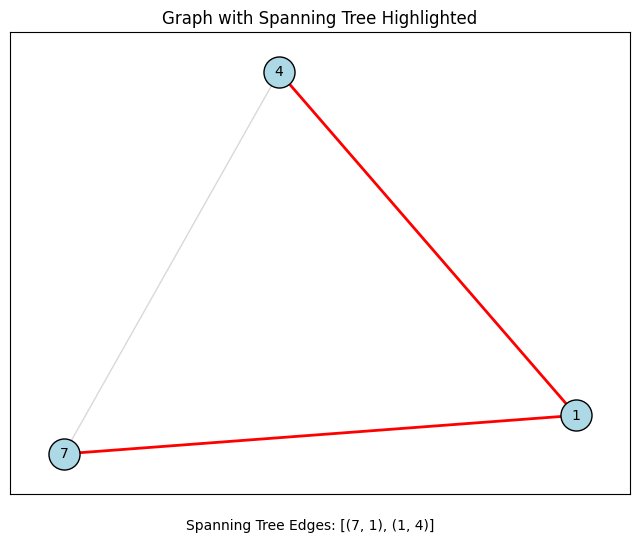


BRIDGES OF ALL FUNDAMENTAL CYCLES
No bridges found for cycle: [4, 1, 7, 4]

PSEUDO-EMBEDDING INFO

A1 matrix:
    0  1  2  3  4  5
 0| 1  0  0  0  0  0
 1| 0  1  0  0  0  0
 2| 0  0  1  0  0  0
 3| 0  0  0  1  0  0
 4| 0  0  0  0  1  0
 5| 0  0  0  0  0  1

B1 matrix:
    0  1  2  3  4  5
 0| 0  -  -  -  -  -
 1| -  0  -  -  -  -
 2| -  -  0  -  -  -
 3| -  -  -  0  -  -
 4| -  -  -  -  0  -
 5| -  -  -  -  -  0

PSEUDO-EMBEDDING
Cycle/Edge    (4, 1)  (7, 1)  (7, 4)  
--------------------------------------
(4, 1, 7, 4)  True    True    True    

                                                  >>> END TRICONNECTED COMPONENT <<<



                                                  >>> TRICONNECTED COMPONENT1  <<<


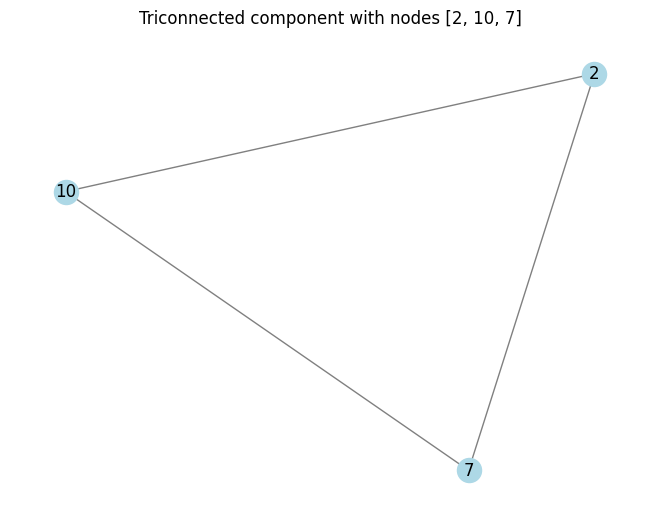

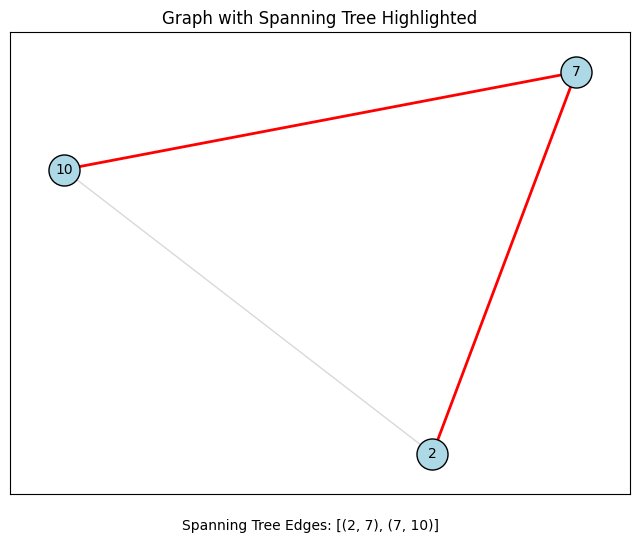


BRIDGES OF ALL FUNDAMENTAL CYCLES
No bridges found for cycle: [2, 7, 10, 2]

PSEUDO-EMBEDDING INFO

A1 matrix:
    0  1  2  3  4  5
 0| 1  0  0  0  0  0
 1| 0  1  0  0  0  0
 2| 0  0  1  0  0  0
 3| 0  0  0  1  0  0
 4| 0  0  0  0  1  0
 5| 0  0  0  0  0  1

B1 matrix:
    0  1  2  3  4  5
 0| 0  -  -  -  -  -
 1| -  0  -  -  -  -
 2| -  -  0  -  -  -
 3| -  -  -  0  -  -
 4| -  -  -  -  0  -
 5| -  -  -  -  -  0

PSEUDO-EMBEDDING
Cycle/Edge     (7, 2)  (10, 2)  (7, 10)  
-----------------------------------------
(2, 7, 10, 2)  True    True     True     

                                                  >>> END TRICONNECTED COMPONENT <<<



                                                  >>> TRICONNECTED COMPONENT2  <<<


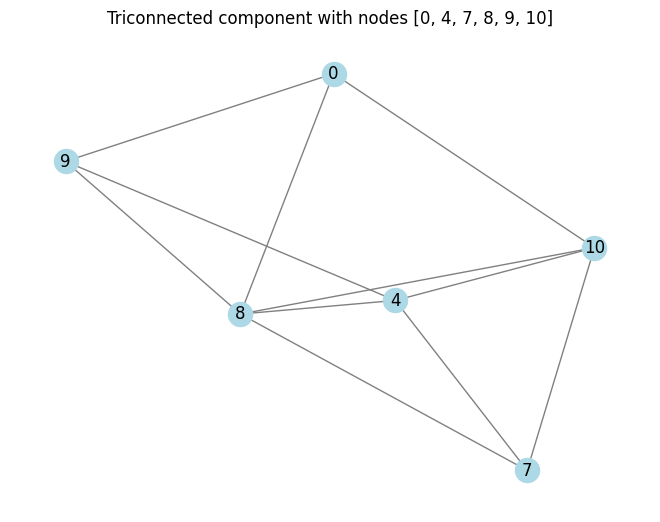

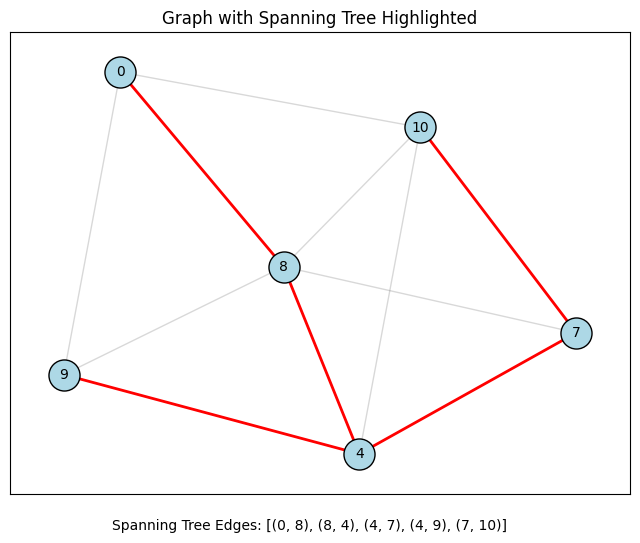


BRIDGES OF ALL FUNDAMENTAL CYCLES


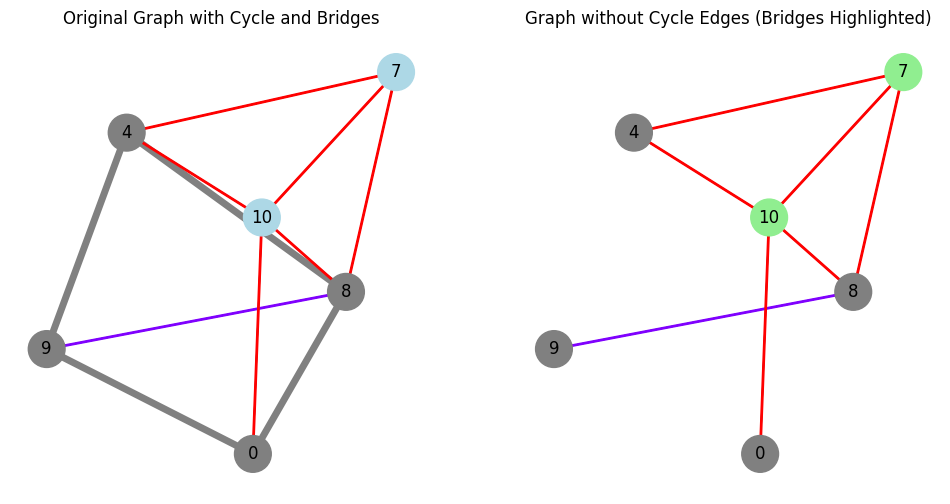

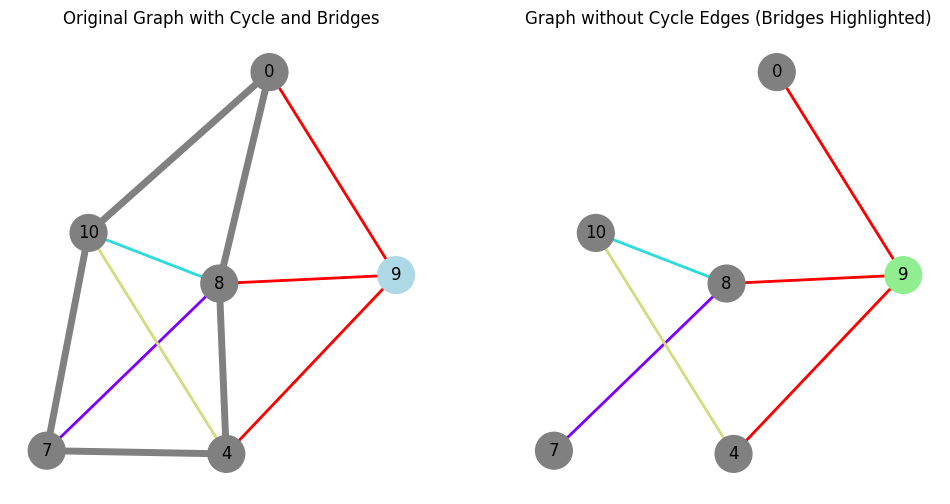

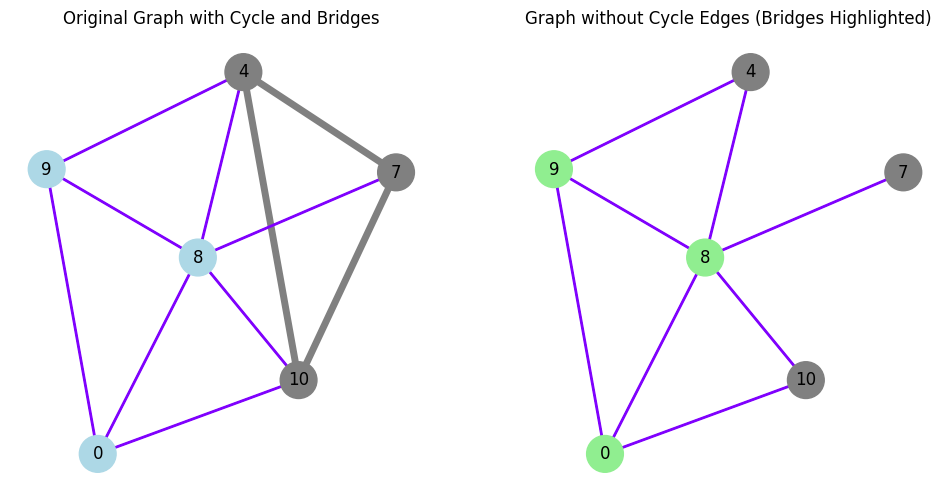

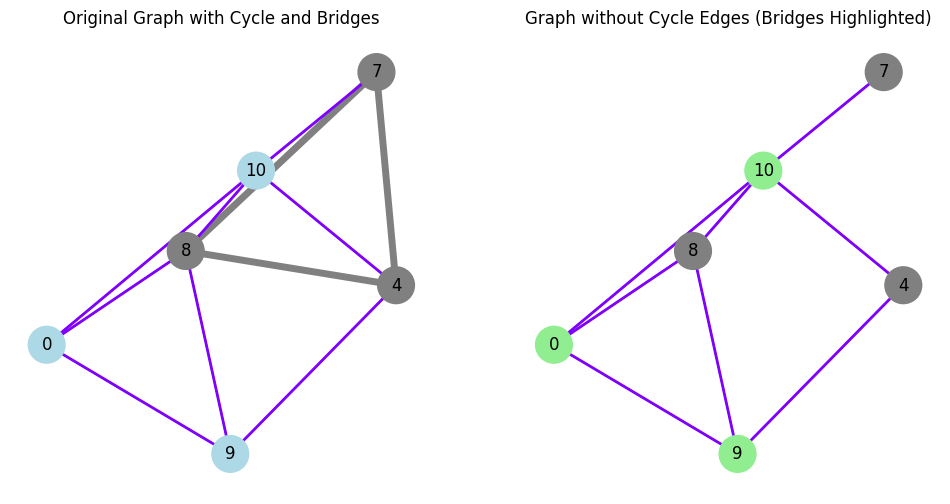

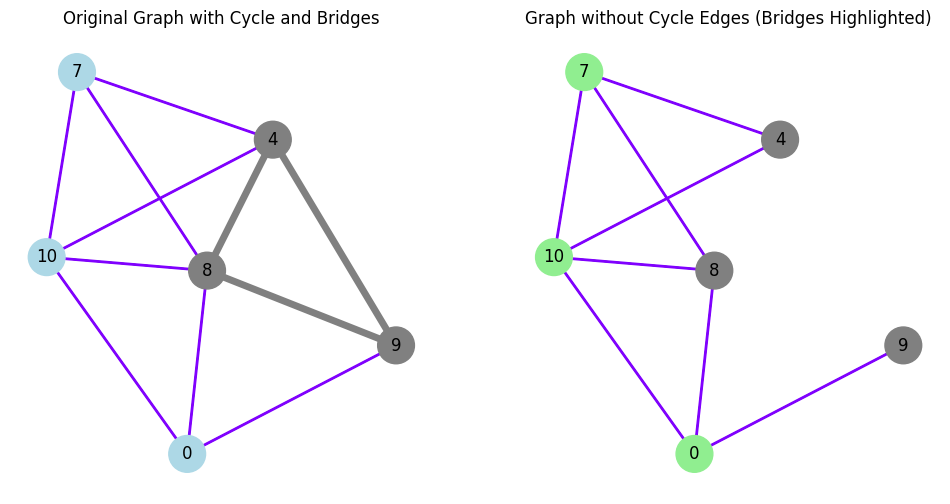

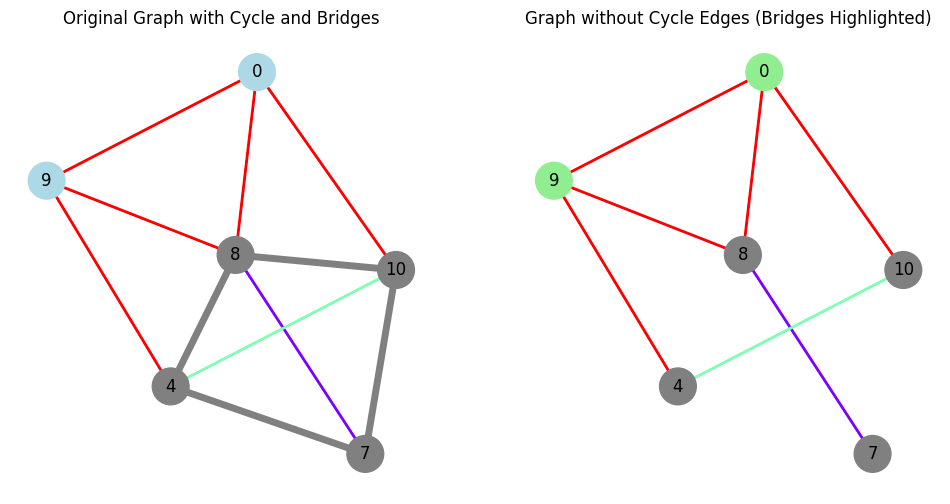


PSEUDO-EMBEDDING INFO

PSEUDO-EMBEDDING
Cycle/Edge           (8, 0)  (9, 0)  (10, 0)  (7, 4)  (8, 4)  (10, 4)  (9, 4)  (8, 7)  (10, 7)  (9, 8)  (10, 8)  
-----------------------------------------------------------------------------------------------------------------
(0, 8, 4, 9, 0)      True    True    False    False   True    False    True    False   False    True    False    
(0, 8, 4, 7, 10, 0)  True    True    True     True    True    True     True    False   True     True    False    
(4, 7, 10, 4)        False   False   False    True    False   True     False   False   True     False   False    
(7, 4, 8, 7)         False   False   False    True    True    False    False   True    False    False   False    
(8, 4, 9, 8)         False   False   False    False   True    False    True    False   False    True    False    
(8, 4, 7, 10, 8)     False   False   False    True    True    False    False   True    True     False   True     

                                              

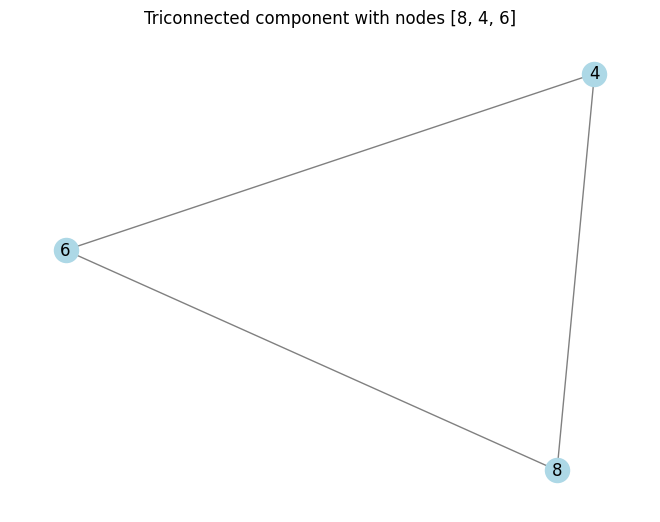

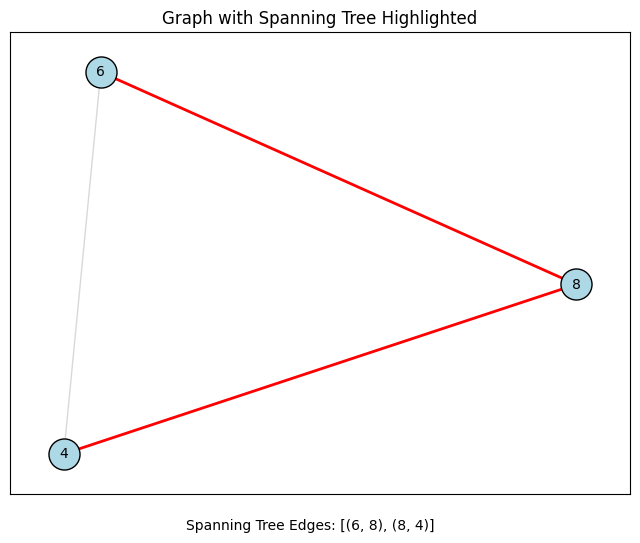


BRIDGES OF ALL FUNDAMENTAL CYCLES
No bridges found for cycle: [4, 8, 6, 4]

PSEUDO-EMBEDDING INFO

A1 matrix:
    0  1  2  3  4  5
 0| 1  0  0  0  0  0
 1| 0  1  0  0  0  0
 2| 0  0  1  0  0  0
 3| 0  0  0  1  0  0
 4| 0  0  0  0  1  0
 5| 0  0  0  0  0  1

B1 matrix:
    0  1  2  3  4  5
 0| 0  -  -  -  -  -
 1| -  0  -  -  -  -
 2| -  -  0  -  -  -
 3| -  -  -  0  -  -
 4| -  -  -  -  0  -
 5| -  -  -  -  -  0

PSEUDO-EMBEDDING
Cycle/Edge    (4, 8)  (6, 8)  (6, 4)  
--------------------------------------
(4, 8, 6, 4)  True    True    True    

                                                  >>> END TRICONNECTED COMPONENT <<<



                                                  >>> TRICONNECTED COMPONENT4  <<<


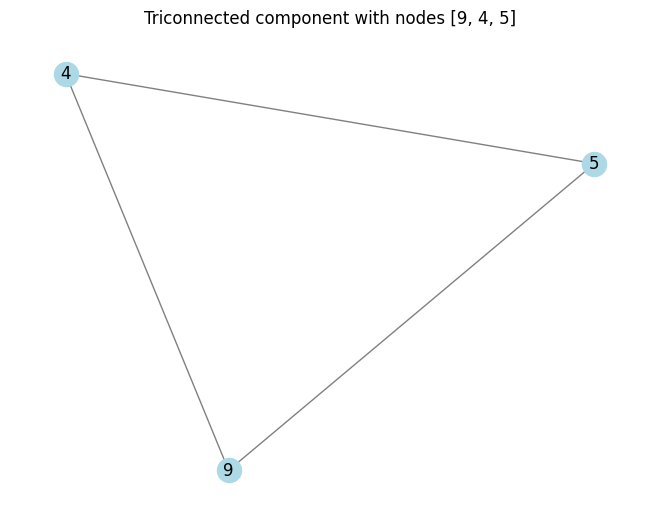

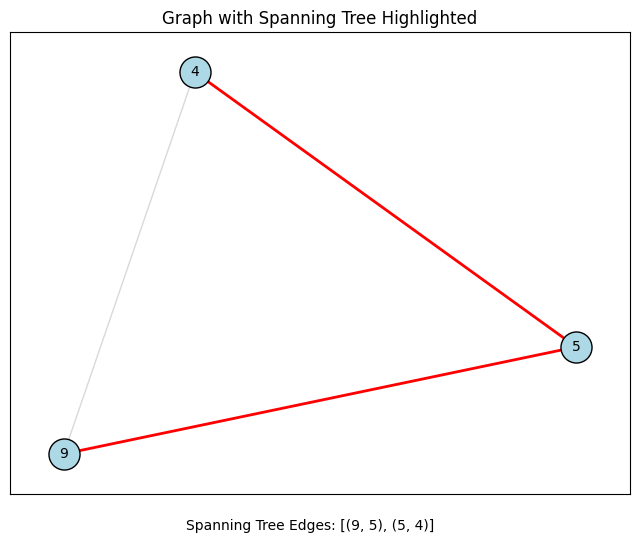


BRIDGES OF ALL FUNDAMENTAL CYCLES
No bridges found for cycle: [9, 5, 4, 9]

PSEUDO-EMBEDDING INFO

A1 matrix:
    0  1  2  3  4  5
 0| 1  0  0  0  0  0
 1| 0  1  0  0  0  0
 2| 0  0  1  0  0  0
 3| 0  0  0  1  0  0
 4| 0  0  0  0  1  0
 5| 0  0  0  0  0  1

B1 matrix:
    0  1  2  3  4  5
 0| 0  -  -  -  -  -
 1| -  0  -  -  -  -
 2| -  -  0  -  -  -
 3| -  -  -  0  -  -
 4| -  -  -  -  0  -
 5| -  -  -  -  -  0

PSEUDO-EMBEDDING
Cycle/Edge    (5, 9)  (4, 9)  (5, 4)  
--------------------------------------
(9, 5, 4, 9)  True    True    True    

                                                  >>> END TRICONNECTED COMPONENT <<<





In [8]:
### EXECUTION OF PLANAR-1(G) STEP BY STEP ###
step_by_step(G)